# Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [ ]:
import pandas as pd
import numpy  as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

Let's download the data and read it into a <em>pandas</em> dataframe.

In [ ]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [ ]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [ ]:
concrete_data.describe() 

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

Lets separate our data into predictors (X) and target (y)

In [ ]:
target = "Strength"
X = concrete_data.copy()
y = X.pop(target)

In [ ]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [ ]:
# number of predictors
n_cols      = X.shape[1]
input_shape = (n_cols,)

# Part D: Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

We start by defining the new architecture

In [ ]:
# Define the new architecture
# model architecture
model_architecture2 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units": 10, "activation": "relu"},
                       "layer_3": {"n_units": 10, "activation": "relu"},
                       "layer_4": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture2))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 10, 'activation': 'relu'}, 'layer_3': {'n_units': 10, 'activation': 'relu'}, 'layer_4': {'n_units': 1}}



In [ ]:
# Just launch the function above (train_and_test_several_models), but with pred_norm = True 
# and model_arch = model_architecture2 and epochs = 100
sq_mse_list_D = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture2,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 3675,
                                              verbose     = 0,
                                              pred_norm   = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 10, 'activation': 'relu'}, 'layer_3': {'n_units': 10, 'activation': 'relu'}, 'layer_4': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coa

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_D = np.mean(sq_mse_list_D)
std_sqmse_D  = np.std(sq_mse_list_D)

df_results.loc[df_results.shape[0]] = ["D",mean_sqmse_D,std_sqmse_D]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,15.397998,6.797415
1,B,18.283187,2.140109
2,C,13.011651,1.156486
3,D,11.389348,0.719344


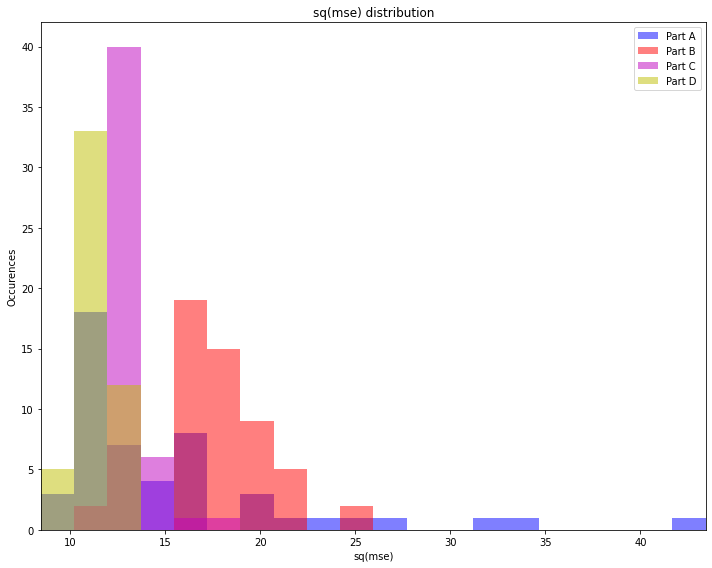

In [ ]:
plot_results(result_list = [sq_mse_list_A, sq_mse_list_B, sq_mse_list_C,sq_mse_list_D],
             label_list  = ["Part A","Part B","Part C","Part D"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

## How does the mean of the mean squared errors compare to that from Step B?

# Answer

By increasing the model complexity (more hidden layers) improves the results, both in terms of precision (mse mean) and stability (mse standard deviation).